<img src="../logo_skmob.png" align="left" width="250">

# **Privacy Risk Assessment**

- Simulate privacy attacks and assess risk with a worst-case scenario framework

-  First, we import the necessary modules

In [1]:
from skmob.privacy import attacks
from skmob.core.trajectorydataframe import TrajDataFrame
from skmob.utils import constants

Let's use a dummy dataset to visualize how risk is computed

In [2]:
trjdat = TrajDataFrame.from_file(filename="./data/privacy_toy.csv")

In [3]:
trjdat

,lat,lng,datetime,uid
0,43.843014,10.507994,2011-02-03 08:34:04,1
1,43.544270,10.326150,2011-02-03 09:34:04,1
2,43.708530,10.403600,2011-02-03 10:34:04,1
3,43.779250,11.246260,2011-02-04 10:34:04,1
4,43.843014,10.507994,2011-02-03 08:34:04,2
5,43.708530,10.403600,2011-02-03 09:34:04,2
6,43.843014,10.507994,2011-02-04 10:34:04,2
7,43.544270,10.326150,2011-02-04 11:34:04,2
8,43.544270,10.326150,2011-02-03 08:34:04,3
9,43.708530,10.403600,2011-02-03 09:34:04,3


- Each type of attack is a separate class inheriting from a generic `Attack` class. 
- We can instatiante an attack model by specifying the length `knowledge_length` of the background knowledge that we want to simulate.

In [7]:
at = attacks.LocationAttack(knowledge_length=2)

- To compute privacy risk for all users, simply call the `assess_risk` function on the trajectory dataframe

In [5]:
at.assess_risk(trjdat)

,uid,risk
0,1,0.333333
1,2,0.500000
2,3,0.333333
3,4,0.333333
4,5,0.250000
5,6,0.250000
6,7,0.500000


### **Assessment options**

- To change the size of the background knowledge, we can either change the `knowledge_length` parameter or instantiate a new attack model

In [8]:
at.knowledge_length = 3
at.assess_risk(trjdat)

,uid,risk
0,1,0.500000
1,2,1.000000
2,3,0.500000
3,4,0.333333
4,5,0.333333
5,6,0.250000
6,7,1.000000


- Not all background knowledge instances may be evaluated during the assessment: if an instance has risk equal to 1.0, the following combinations are discarded
- If you want to show all possible instances, use the `force_instances` parameter
- As all instances are computed, this may require long times and high memory usage
- Combinations are identified by the attribute `instance` while the elements in the instance are indicated with the attribute `instance_elem`

In [11]:
at.assess_risk(trjdat, force_instances=True)

,lat,lng,datetime,uid,instance,instance_elem,prob
0,43.843014,10.507994,2011-02-03 08:34:04,1,1,1,0.333333
1,43.544270,10.326150,2011-02-03 09:34:04,1,1,2,0.333333
2,43.708530,10.403600,2011-02-03 10:34:04,1,1,3,0.333333
3,43.843014,10.507994,2011-02-03 08:34:04,1,2,1,0.500000
4,43.544270,10.326150,2011-02-03 09:34:04,1,2,2,0.500000
5,43.779250,11.246260,2011-02-04 10:34:04,1,2,3,0.500000
6,43.843014,10.507994,2011-02-03 08:34:04,1,3,1,0.333333
7,43.708530,10.403600,2011-02-03 10:34:04,1,3,2,0.333333
8,43.779250,11.246260,2011-02-04 10:34:04,1,3,3,0.333333
9,43.544270,10.326150,2011-02-03 09:34:04,1,4,1,0.333333


- Complexity is dominated by the number of combinations
- The number of combinations generated depends on:
    1. length of the background knowledge
    2. the average length of each user's trajectory. 

\begin{equation*}
\mathcal{O} \Bigl(  \binom{l}{k} |T|  matching \Bigr)
\end{equation*}

- $l$ is the length of the current trajectory considered
- $k$ is the background knowledge length
- $T$ is the set of all target trajectories
- $matching$ stands for the cost of the matching operation between each combination and the data.

- A subset of the users can be specified with the parameter `targets`
- Probability of reidentification is still computed against the entire dataset 
- `targets` can be used in combination with `force_instances` to isolate specific individuals

In [13]:
t = [1,2]
at.assess_risk(trjdat, targets=t, force_instances=True)

,lat,lng,datetime,uid,instance,instance_elem,prob
0,43.843014,10.507994,2011-02-03 08:34:04,1,1,1,0.333333
1,43.544270,10.326150,2011-02-03 09:34:04,1,1,2,0.333333
2,43.708530,10.403600,2011-02-03 10:34:04,1,1,3,0.333333
3,43.843014,10.507994,2011-02-03 08:34:04,1,2,1,0.500000
4,43.544270,10.326150,2011-02-03 09:34:04,1,2,2,0.500000
5,43.779250,11.246260,2011-02-04 10:34:04,1,2,3,0.500000
6,43.843014,10.507994,2011-02-03 08:34:04,1,3,1,0.333333
7,43.708530,10.403600,2011-02-03 10:34:04,1,3,2,0.333333
8,43.779250,11.246260,2011-02-04 10:34:04,1,3,3,0.333333
9,43.544270,10.326150,2011-02-03 09:34:04,1,4,1,0.333333


- Risk computation is time consuming
- To check on the progress, we can use the `show_progress` attribute

In [14]:
r = at.assess_risk(trjdat, show_progress=True)
r

computing risk: 100%|██████████| 7/7 [00:01<00:00,  5.97it/s]


,uid,risk
0,1,0.500000
1,2,1.000000
2,3,0.500000
3,4,0.333333
4,5,0.333333
5,6,0.250000
6,7,1.000000


## **Attack Models**
The library provides eight attack models, each with a different background knowledge:
 - `LocationAttack`: uses the locations visited.
 - `LocationSequenceAttack`: uses the locations visited with information about the order of visit
 - `LocationTimeAttack`: uses the locations visited and the time of visit. A precision for the time can be specified

- `UniqueLocationAttack`: uses the unique locations visited, i.e., disregarding repeated visits to a same location. It operates on frequency vectors
- `LocationFrequencyAttack`: uses the unique locations visited and the frequency with which they were visited. It operates on frequency vectors
- `LocationProbabilityAttack`: uses the unique locations visited and the probability with which they were visited. It operates on probability vectors

 - `LocationProportionAttack`: uses the unique locations visited and the relative proportion of the frequencies of visit. It operates on frequency vectors
 - `HomeWorkAttack`: uses the two most visited locations

Here are a couple examples to better understand how the matching of instances and data works.

### **Location Attack**

In [16]:
at = attacks.LocationAttack(knowledge_length=2)
r = at.assess_risk(trjdat, targets=[1], force_instances=True)
r

,lat,lng,datetime,uid,instance,instance_elem,prob
0,43.843014,10.507994,2011-02-03 08:34:04,1,1,1,0.250000
1,43.544270,10.326150,2011-02-03 09:34:04,1,1,2,0.250000
2,43.843014,10.507994,2011-02-03 08:34:04,1,2,1,0.250000
3,43.708530,10.403600,2011-02-03 10:34:04,1,2,2,0.250000
4,43.843014,10.507994,2011-02-03 08:34:04,1,3,1,0.250000
5,43.779250,11.246260,2011-02-04 10:34:04,1,3,2,0.250000
6,43.544270,10.326150,2011-02-03 09:34:04,1,4,1,0.250000
7,43.708530,10.403600,2011-02-03 10:34:04,1,4,2,0.250000
8,43.544270,10.326150,2011-02-03 09:34:04,1,5,1,0.333333
9,43.779250,11.246260,2011-02-04 10:34:04,1,5,2,0.333333


- The *background knowledge* consists of locations, with no information about the order of visits to it. 
- From the example above, from the first instance the following information is used:

In [11]:
trjdat[trjdat[constants.UID] == 1][[constants.LATITUDE, 
                                    constants.LONGITUDE]].iloc[0:2]

,lat,lng
0,43.843014,10.507994
1,43.544270,10.326150


#### Which matches with:

In [12]:
trjdat[trjdat[constants.UID].isin([1,2,3,6])]

,lat,lng,datetime,uid
0,43.843014,10.507994,2011-02-03 08:34:04,1
1,43.544270,10.326150,2011-02-03 09:34:04,1
2,43.708530,10.403600,2011-02-03 10:34:04,1
3,43.779250,11.246260,2011-02-04 10:34:04,1
4,43.843014,10.507994,2011-02-03 08:34:04,2
5,43.708530,10.403600,2011-02-03 09:34:04,2
6,43.843014,10.507994,2011-02-04 10:34:04,2
7,43.544270,10.326150,2011-02-04 11:34:04,2
8,43.544270,10.326150,2011-02-03 08:34:04,3
9,43.708530,10.403600,2011-02-03 09:34:04,3


### **Location Sequence Attack**

In [17]:
at = attacks.LocationSequenceAttack(knowledge_length=2)
r = at.assess_risk(trjdat, targets=[1], force_instances=True)
r

,lat,lng,datetime,uid,instance,instance_elem,prob
0,43.843014,10.507994,2011-02-03 08:34:04,1,1,1,0.333333
1,43.544270,10.326150,2011-02-03 09:34:04,1,1,2,0.333333
2,43.843014,10.507994,2011-02-03 08:34:04,1,2,1,0.500000
3,43.708530,10.403600,2011-02-03 10:34:04,1,2,2,0.500000
4,43.843014,10.507994,2011-02-03 08:34:04,1,3,1,0.333333
5,43.779250,11.246260,2011-02-04 10:34:04,1,3,2,0.333333
6,43.544270,10.326150,2011-02-03 09:34:04,1,4,1,0.500000
7,43.708530,10.403600,2011-02-03 10:34:04,1,4,2,0.500000
8,43.544270,10.326150,2011-02-03 09:34:04,1,5,1,0.333333
9,43.779250,11.246260,2011-02-04 10:34:04,1,5,2,0.333333


- The *background knowledge* consists of locations and the order of visit

In [14]:
trjdat[trjdat[constants.UID] == 1][[constants.LATITUDE, 
                                    constants.LONGITUDE]].iloc[0:2]

,lat,lng
0,43.843014,10.507994
1,43.544270,10.326150


#### Which matches with:

In [15]:
trjdat[trjdat[constants.UID].isin([1,2,6])]

,lat,lng,datetime,uid
0,43.843014,10.507994,2011-02-03 08:34:04,1
1,43.544270,10.326150,2011-02-03 09:34:04,1
2,43.708530,10.403600,2011-02-03 10:34:04,1
3,43.779250,11.246260,2011-02-04 10:34:04,1
4,43.843014,10.507994,2011-02-03 08:34:04,2
5,43.708530,10.403600,2011-02-03 09:34:04,2
6,43.843014,10.507994,2011-02-04 10:34:04,2
7,43.544270,10.326150,2011-02-04 11:34:04,2
18,43.843014,10.507994,2011-02-04 10:34:04,6
19,43.544270,10.326150,2011-02-04 11:34:04,6


- Depending on the attack, risk changes according to the different matching criteria.

### **What are frequency and probability vectors?**
- Two functions that create dataframes derived from `TrajDataFrame`

In [18]:
from skmob.utils.utils import frequency_vector, probability_vector

In [17]:
frequency_vector(trjdat).head(10)

,uid,lat,lng,freq
0,1,43.544270,10.326150,1
1,1,43.708530,10.403600,1
2,1,43.779250,11.246260,1
3,1,43.843014,10.507994,1
4,2,43.544270,10.326150,1
5,2,43.708530,10.403600,1
6,2,43.843014,10.507994,2
7,3,43.544270,10.326150,1
8,3,43.708530,10.403600,1
9,3,43.779250,11.246260,1


In [18]:
probability_vector(trjdat).head(10)

,uid,lat,lng,prob
0,1,43.544270,10.326150,0.25
1,1,43.708530,10.403600,0.25
2,1,43.779250,11.246260,0.25
3,1,43.843014,10.507994,0.25
4,2,43.544270,10.326150,0.25
5,2,43.708530,10.403600,0.25
6,2,43.843014,10.507994,0.50
7,3,43.544270,10.326150,0.25
8,3,43.708530,10.403600,0.25
9,3,43.779250,11.246260,0.25


### **Special parameters**

- some attacks, such as `LocationTimeAttack` need parameters for initialization
- `LocationTimeAttack` uses the informaton of the time of visit

In [22]:
at = attacks.LocationTimeAttack(knowledge_length=2, time_precision="Day")
r = at.assess_risk(trjdat, targets=[1], force_instances=True)
r

,lat,lng,datetime,uid,instance,instance_elem,prob
0,43.843014,10.507994,2011-02-03 08:34:04,1,1,1,1.0
1,43.544270,10.326150,2011-02-03 09:34:04,1,1,2,1.0
2,43.843014,10.507994,2011-02-03 08:34:04,1,2,1,0.5
3,43.708530,10.403600,2011-02-03 10:34:04,1,2,2,0.5
4,43.843014,10.507994,2011-02-03 08:34:04,1,3,1,1.0
5,43.779250,11.246260,2011-02-04 10:34:04,1,3,2,1.0
6,43.544270,10.326150,2011-02-03 09:34:04,1,4,1,0.5
7,43.708530,10.403600,2011-02-03 10:34:04,1,4,2,0.5
8,43.544270,10.326150,2011-02-03 09:34:04,1,5,1,0.5
9,43.779250,11.246260,2011-02-04 10:34:04,1,5,2,0.5


In [24]:
at = attacks.LocationTimeAttack(knowledge_length=2, time_precision="Month")
r = at.assess_risk(trjdat, targets=[1], force_instances=True)
r

,lat,lng,datetime,uid,instance,instance_elem,prob
0,43.843014,10.507994,2011-02-03 08:34:04,1,1,1,0.250000
1,43.544270,10.326150,2011-02-03 09:34:04,1,1,2,0.250000
2,43.843014,10.507994,2011-02-03 08:34:04,1,2,1,0.250000
3,43.708530,10.403600,2011-02-03 10:34:04,1,2,2,0.250000
4,43.843014,10.507994,2011-02-03 08:34:04,1,3,1,0.250000
5,43.779250,11.246260,2011-02-04 10:34:04,1,3,2,0.250000
6,43.544270,10.326150,2011-02-03 09:34:04,1,4,1,0.250000
7,43.708530,10.403600,2011-02-03 10:34:04,1,4,2,0.250000
8,43.544270,10.326150,2011-02-03 09:34:04,1,5,1,0.333333
9,43.779250,11.246260,2011-02-04 10:34:04,1,5,2,0.333333


- in the second case, the precision is lower, and the risk changes accordingly

- For `LocationFrequency`, `LocationProbability` and `LocationProportionAttack` a tolerance level can be specified for the matching of the frequency, probability and proportion of the visits, respectively

In [22]:
at = attacks.LocationFrequencyAttack(knowledge_length=2, tolerance=0.1)
r = at.assess_risk(trjdat, targets=[1], force_instances=True)
r

,instance,reid_prob
uid,,
1,"([1.0, 43.544270000000004, 10.32615, 1.0], [1....",0.250000
1,"([1.0, 43.544270000000004, 10.32615, 1.0], [1....",0.333333
1,"([1.0, 43.544270000000004, 10.32615, 1.0], [1....",0.333333
1,"([1.0, 43.708529999999996, 10.4036, 1.0], [1.0...",0.250000
1,"([1.0, 43.708529999999996, 10.4036, 1.0], [1.0...",0.333333
1,"([1.0, 43.77925, 11.246260000000001, 1.0], [1....",0.333333


In [23]:
at = attacks.LocationFrequencyAttack(knowledge_length=2, tolerance=0.8)
r = at.assess_risk(trjdat, targets=[1], force_instances=True)
r

,instance,reid_prob
uid,,
1,"([1.0, 43.544270000000004, 10.32615, 1.0], [1....",0.250000
1,"([1.0, 43.544270000000004, 10.32615, 1.0], [1....",0.333333
1,"([1.0, 43.544270000000004, 10.32615, 1.0], [1....",0.250000
1,"([1.0, 43.708529999999996, 10.4036, 1.0], [1.0...",0.250000
1,"([1.0, 43.708529999999996, 10.4036, 1.0], [1.0...",0.250000
1,"([1.0, 43.77925, 11.246260000000001, 1.0], [1....",0.250000


- Risk may be visualized in many different ways
- A very simple and intuitive way is a cumulative distribution function.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
results = dict()
for my_k in [2,3]:
    at = attacks.LocationAttack(knowledge_length=my_k)
    r = at.assess_risk(trjdat)
    results[my_k] = r
colors = {2:"blue",3:"red"}
styles = {2:"-",3:":"}

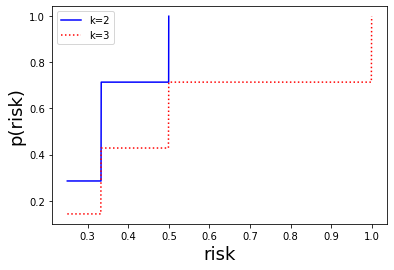

In [29]:
plt.figure()
plt.xlabel("risk",size=18)
plt.ylabel("p(risk)", size=18)
for k,r in results.items():
    data = r["risk"].tolist()
    values, base = np.histogram(data, bins=1000)
    cumulative = np.cumsum(values)
    plt.plot(base[:-1],cumulative/len(data), c=colors[k], label="k="+str(k), linestyle=styles[k])
plt.legend()
plt.show()

- On real (GPS) data results should look like this
<img src="./data/image18.png" width="400">